# Test evidence

[plot_timeseries does not handle types properly](https://github.com/Lumiwealth/quantstats_lumi/issues/61#issuecomment-2392127437)

Table below provide tracebility of issues

| version | method | input type | status |
| --- | --- | --- | --- |
| [main](https://github.com/Lumiwealth/quantstats_lumi/tree/main)     | [plot_timeseries](https://github.com/Lumiwealth/quantstats_lumi/blob/main/quantstats_lumi/_plotting/core.py)  | pd.Series |<span style="color:green; font-weight:bold;">OK</span> |
| [main](https://github.com/Lumiwealth/quantstats_lumi/tree/main)     | [plot_timeseries](https://github.com/Lumiwealth/quantstats_lumi/blob/main/quantstats_lumi/_plotting/core.py)  | pd.DataFrame | <span style="color:red; font-weight:bold;">ERROR</span> |
| [main](https://github.com/Lumiwealth/quantstats_lumi/tree/main)     | [reports.full](https://github.com/Lumiwealth/quantstats_lumi/blob/main/quantstats_lumi/reports.py)  | pd.Series |<span style="color:red; font-weight:bold;">ERROR</span> |
| [main](https://github.com/Lumiwealth/quantstats_lumi/tree/main)     | [reports.full](https://github.com/Lumiwealth/quantstats_lumi/blob/main/quantstats_lumi/reports.py)  | pd.DataFrame | <span style="color:red; font-weight:bold;">ERROR</span> |
  

In [1]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')
from numpy import sqrt
import pandas as pd
import quantstats_lumi as qs
from quantstats_lumi._plotting.core import plot_timeseries
from quantstats_lumi.reports import full
from sys import version_info


import subprocess
import numpy as np

print("Python version: ", version_info)
print("Pandas version: ", pd.__version__)
print("Numpy version: ", np.__version__)
print("quantstats_lumi version: ", qs.__version__)

# get git sha1
sha1 = subprocess.check_output(['git', 'rev-parse', 'HEAD']).decode('ascii').strip()
status = subprocess.check_output(['git', 'status']).decode('ascii').strip()
print("Git SHA1: ", sha1)
print("Status: ", status)


Python version:  sys.version_info(major=3, minor=11, micro=9, releaselevel='final', serial=0)
Pandas version:  2.2.3
Numpy version:  2.1.1
quantstats_lumi version:  0.3.3
Git SHA1:  097f85f4196b45ff01af24f85322782f8ef01cc6
Status:  On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.venv/
	test_311_error.ipynb

nothing added to commit but untracked files present (use "git add" to track)


In [2]:
# generate some random stock returns for testing purposes
np.random.seed(42)
trading_days = 1000
strategy_s = pd.Series(np.random.normal(0.11/252, 0.09/sqrt(252), trading_days), name='Strategy')
benchmark_s = pd.Series(np.random.normal(0.1/252, 0.1/sqrt(252), trading_days), name='Benchmark')
# generate 1000 week days starting from 2010-01-01
dates = pd.date_range('2010-01-01', periods=trading_days, freq='B')
strategy_s.index = dates
benchmark_s.index = dates
strategy_df = pd.DataFrame(strategy_s)


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


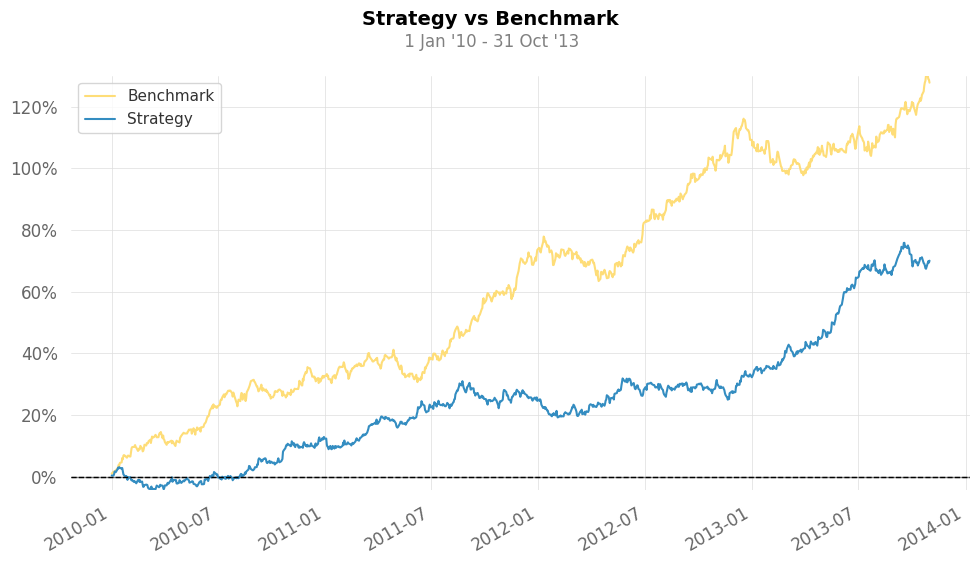

In [3]:
plot_timeseries(strategy_s, benchmark_s, compound=True,title="Strategy vs Benchmark") # use pd.Series

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


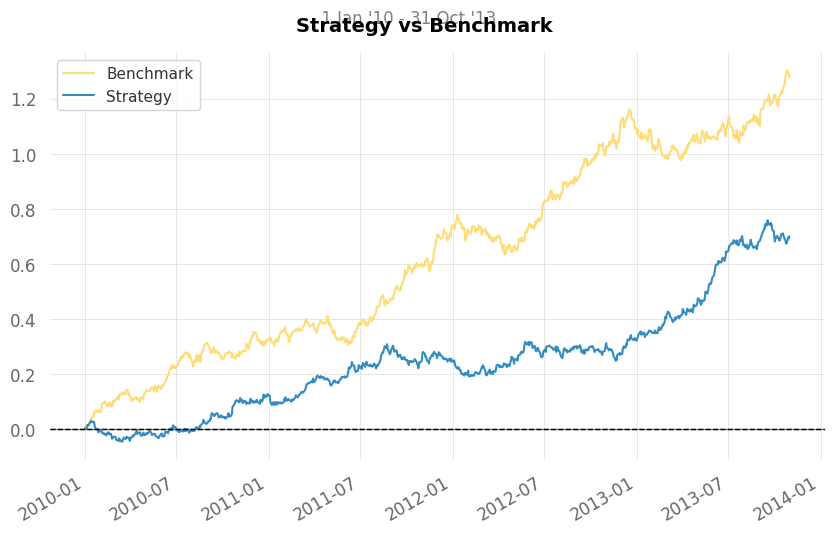

In [4]:
plot_timeseries(strategy_df, benchmark_s, compound=True, title="Strategy vs Benchmark") # use pd.DataFrames

                             Benchmark    Strategy
---------------------------  -----------  ----------
Start Period                 2010-01-01   2010-01-01
End Period                   2013-10-31   2013-10-31
Risk-Free Rate %             0.0%         0.0%
Time in Market %             100.0%       100.0%

Total Return                 128%         70%
CAGR% (Annual Return)        23.95%       14.85%

Sharpe                       2.56         1.88
RoMaD                        2.82         1.65
Corr to Benchmark            1.0          -0.04
Prob. Sharpe Ratio %         100.0%       99.91%
Smart Sharpe                 2.54         1.87
Sortino                      4.02         2.93
Smart Sortino                3.99         2.91
Sortino/√2                   2.84         2.07
Smart Sortino/√2             2.82         2.06
Omega                        1.28         1.28

Max Drawdown %               -8.49%       -9.0%
Longest DD Days              261          273
Volatility (ann.) %          

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2011-08-25,2012-02-03,2012-05-23,273,-8.997361,-8.725181
2,2010-01-15,2010-03-16,2010-08-23,221,-7.256073,-6.944416
3,2012-05-25,2012-11-20,2012-12-12,202,-5.233651,-4.748232
4,2013-09-19,2013-10-25,2013-10-31,43,-4.787594,-4.677289
5,2010-12-31,2011-01-12,2011-03-04,64,-3.535230,-3.523954


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


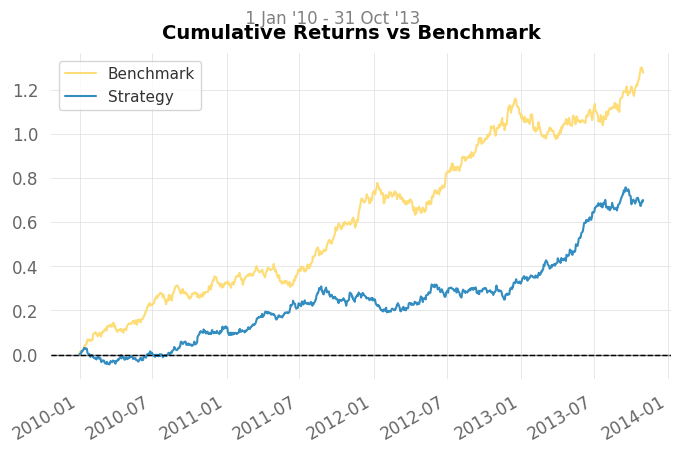

In [5]:
full(strategy_s, benchmark_s, title="Strategy vs Benchmark") # pd.Series

In [6]:
full(strategy_df, benchmark_s, title="Strategy vs Benchmark") # use DataFrames

TypeError: Index(...) must be called with a collection of some kind, 'Strategy' was passed